# Analyzer of Stocks


## Libraries


In [1]:
# Import necessary libraries
from dotenv import load_dotenv
from libs import indicators, signals
import alpaca_trade_api as trade_api
import os
import pandas as pd
import matplotlib.pyplot as plt


## Alpaca Connection


In [2]:
load_dotenv()


True

In [3]:
# Get keys and URL for Alpaca API
alpaca_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')
alpaca_paper_trade_url = os.getenv('APCA_API_PAPER_URL')


In [4]:
# Instantiate Alpaca connection
alpaca = trade_api.REST(alpaca_key, alpaca_secret_key, base_url=alpaca_paper_trade_url)


In [5]:
# Default parameters
ticker = 'TWOU'

today = pd.Timestamp('today')
today_date = f'{today:%Y-%m-%d}'

start_date = pd.Timestamp('2018-01-01', tz='America/New_York').isoformat()

end_date = pd.Timestamp(today_date, tz='America/New_York').isoformat()

timeframe = '1D'


In [6]:
# Get dataframe of ticker data
df_ohlcv_original = alpaca.get_barset(ticker, timeframe, start=start_date, end=end_date).df

# Copy of original dataframe
df_ohlcv = df_ohlcv_original[ticker].copy()


## Bollinger Bands


In [7]:
# Generate Bollinger Band data
df_updated = indicators.bollinger_band_generator(df_ohlcv)


## Keltner Channels


In [8]:
# Generate average true range values
df_updated = indicators.keltner_channel_generator(df_updated)


## EWMA (Fast and Slow)


In [9]:
# Generate ewma values
# Default fast = 12 and slow = 25.  Increase sensitivity: fast = 5 and slow = 35
df_updated = indicators.ewma_generator(df_updated, 5, 35)


## MACD 


In [10]:
# Generate macd values
df_updated = indicators.macd_generator(df_updated)


In [11]:
# Drop nan values
df_updated.dropna(inplace=True)


## Bollinger Bands and Keltner Channels Indicators Plot


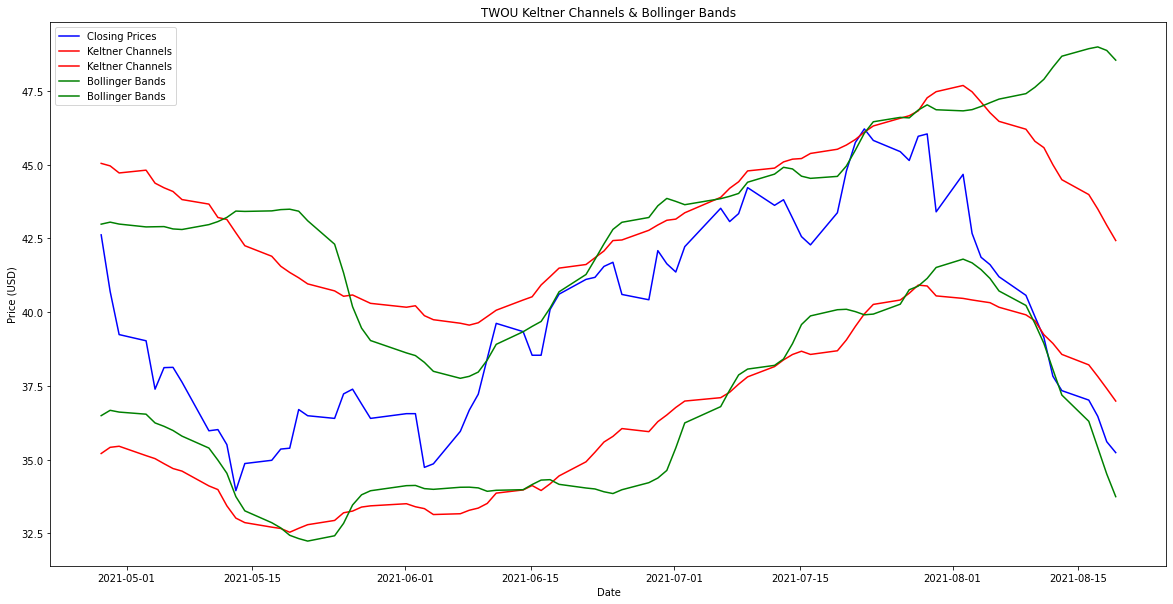

In [12]:
# Generate Keltner Channels and Bollinger Bands plot
plt.figure(figsize=(20,10))
plt.title(f'{ticker} Keltner Channels & Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(df_updated[['close']], color='b', label='Closing Prices')
plt.plot(df_updated[['kc_upper', 'kc_lower']], color="r", label='Keltner Channels')
plt.plot(df_updated[['bb_upper', 'bb_lower']], color="g", label='Bollinger Bands')
plt.legend(loc='upper left')


## Exponential Weighted Moving Average (EWMA) Plot


<AxesSubplot:title={'center':'EWMA Fast and Slow'}, xlabel='Date', ylabel='Price (USD)'>

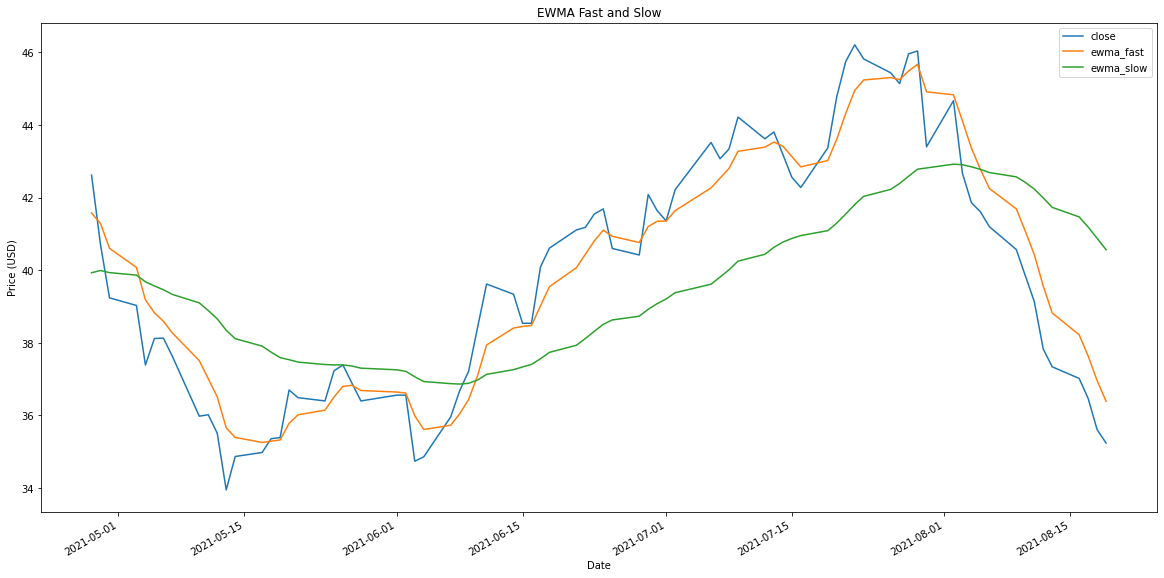

In [13]:
# Generate MACD Fast and Slow plot
df_updated[['close', 'ewma_fast', 'ewma_slow']].plot(figsize=(20,10), title='EWMA Fast and Slow', xlabel='Date', ylabel='Price (USD)')


In [14]:
df_updated = signals.bbands_inside_kchannels(df_updated)
df_updated = signals.ewma_crossovers(df_updated)
df_updated = signals.macd(df_updated, 5)


## MACD Signals


<AxesSubplot:title={'center':'MACD Signal With Divergence'}, xlabel='Date', ylabel='Amount of Divergence'>

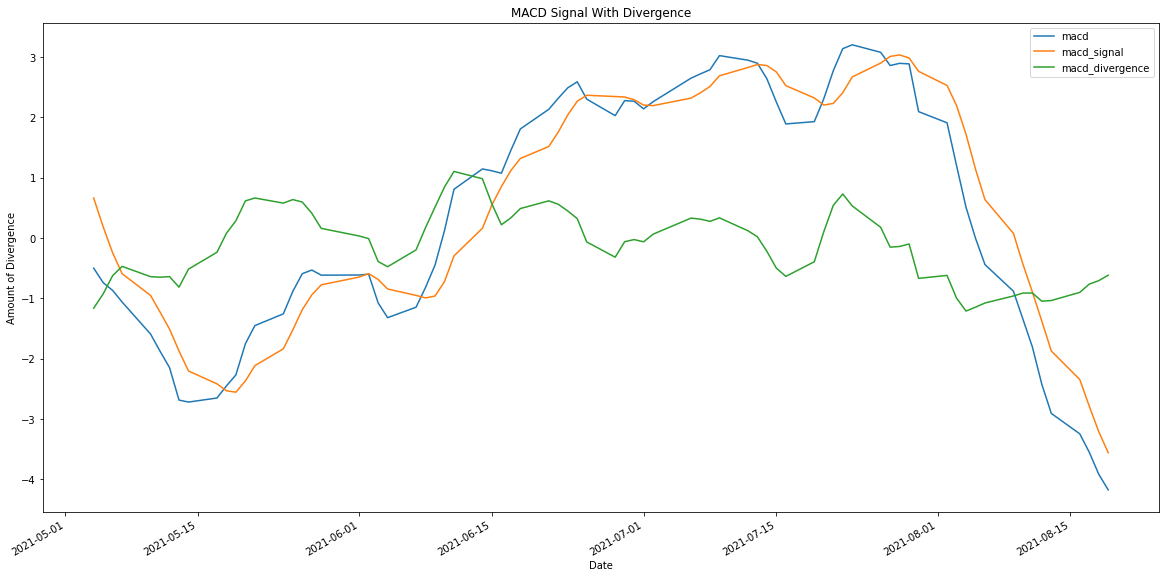

In [25]:
# Generate MACD with signal and divergence lines
df_updated[['macd', 'macd_signal', 'macd_divergence']].plot(figsize=(20,10), title='MACD Signal With Divergence', xlabel='Date', ylabel='Amount of Divergence')


In [16]:
# Drop nan values
df_updated.dropna(inplace=True)


In [21]:
# Display dataframe
df_updated.head(10)


,open,high,low,close,volume,bb_upper,bb_middle,bb_lower,atr,kc_upper,kc_middle,kc_lower,ewma_fast,ewma_slow,macd,bbkc_squeeze,ewma_crossover_signal,macd_signal,macd_divergence
time,,,,,,,,,,,,,,,,,,,
2021-05-04 00:00:00-04:00,38.01,38.180,35.74,37.39,1648088,42.894534,39.5705,36.246466,2.333889,44.371870,39.704093,35.036315,39.182378,39.681403,-0.499025,1.0,-1.0,0.663973,-1.162998
2021-05-05 00:00:00-04:00,37.97,39.000,37.39,38.12,973267,42.899807,39.5155,36.131193,2.337635,44.215036,39.539766,34.864496,38.828238,39.567331,-0.739094,1.0,0.0,0.187078,-0.926171
2021-05-06 00:00:00-04:00,37.93,38.210,35.84,38.13,1155891,42.820134,39.4050,35.989866,2.347136,44.089027,39.394756,34.700484,38.595486,39.464130,-0.868645,1.0,0.0,-0.245027,-0.623618
2021-05-07 00:00:00-04:00,39.17,39.980,37.55,37.63,1231474,42.801110,39.3000,35.798890,2.300470,43.815543,39.214604,34.613664,38.273651,39.334544,-1.060893,1.0,0.0,-0.590939,-0.469954
2021-05-10 00:00:00-04:00,37.46,37.550,35.74,35.98,982094,42.966799,39.1805,35.394201,2.387617,43.661884,38.886650,34.111416,37.509092,39.101062,-1.591970,1.0,0.0,-0.951925,-0.640045
2021-05-11 00:00:00-04:00,33.92,36.480,33.32,36.02,1957076,43.069562,39.0275,34.985438,2.305226,43.208232,38.597779,33.987327,37.012724,38.889585,-1.876861,1.0,0.0,-1.227493,-0.649368
2021-05-12 00:00:00-04:00,35.00,35.660,34.45,35.51,1200732,43.211481,38.8760,34.540519,2.425963,43.140263,38.288337,33.436412,36.511813,38.660614,-2.148800,0.0,0.0,-1.509434,-0.639366
2021-05-13 00:00:00-04:00,35.37,36.720,33.21,33.95,1448926,43.425320,38.5875,33.749680,2.417291,42.690306,37.855724,33.021142,35.657873,38.345309,-2.687436,0.0,0.0,-1.873192,-0.814244
2021-05-14 00:00:00-04:00,34.31,36.289,34.04,34.87,1119862,43.414199,38.3405,33.266801,2.346083,42.251484,37.559319,32.867154,35.395248,38.115306,-2.720058,0.0,0.0,-2.205025,-0.515033
